### Project 1
#### Capstone Project: Batch Processing Pipeline for Ride-Sharing Analytics

#### Objective: 
###### To build an end-to-end batch processing pipeline that ingests, transforms, and 
###### analyzes ride-sharing data using Apache Spark, Python, and SQL. The project will 
###### demonstrate the student’s ability to process large datasets efficiently.

#### 1. Data Ingestion 

###### • Download or generate a sample dataset of historical ride-sharing data (e.g., rides.csv). 
###### • Use Spark to load data into a DataFrame. 

In [162]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CapstoneProject").getOrCreate()

In [163]:
from pyspark.sql.types import  StructType, StructField, StringType, ArrayType, IntegerType, FloatType, DateType, BooleanType

ride_df = spark.read.format("csv"). option("header", "true") \
.load("C:/Users/Lovette/sparktests/sparkdf/Python_Practise/canada-rides.csv")

ride_schema = (StructType([
    StructField("ride_id", StringType(), True),
    StructField("driver_id", StringType(), True),
    StructField("passenger", StringType(), True),
    StructField("city", StringType(), True),
    StructField("pickup_time", StringType(), True),
    StructField("dropoff_time", StringType(), True),
    StructField("distance_km", StringType(), True),
    StructField("fare_amount", StringType(), True)
]))

In [164]:
#SQL

ride_df.show()

ride_df.createOrReplaceTempView("rides")

spark.sql("select * from rides where lower(city) = 'calgary' order by pickup_time ").show()

+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
| ride_id|driver_id|passenger_id|     city|        pickup_time|       dropoff_time|distance_km|fare_amount|
+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
|c316e38f| a7fd7d33|    b45c40aa|   Ottawa|2024-07-24 01:54:00|2024-07-24 02:49:00|      27.92|      69.38|
|c1949764| aa9446f3|    7eb56af9| Montreal|2024-05-24 02:22:00|2024-05-24 02:35:00|       8.99|      19.95|
|3f500b60| 3e83bc70|    da010c6c| Montreal|2024-12-06 21:51:00|2024-12-06 22:14:00|      19.49|       31.7|
|70ea96dd| 4cceab04|    8fa1dfd0|  Halifax|2024-05-27 03:47:00|2024-05-27 04:26:00|       9.04|      25.75|
|474ef781| c5385398|    a7d49d3e| Edmonton|2024-04-10 11:35:00|2024-04-10 12:02:00|      19.97|      51.45|
|3bad8ed3| 5827120c|    2288a9bf|   Ottawa|2024-09-22 09:59:00|2024-09-22 10:25:00|      12.21|      26.62|
|68c29089| 73a943b2|    0caa

In [165]:
ride_df.show()

ride_df.select("ride_id").count()

+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
| ride_id|driver_id|passenger_id|     city|        pickup_time|       dropoff_time|distance_km|fare_amount|
+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
|c316e38f| a7fd7d33|    b45c40aa|   Ottawa|2024-07-24 01:54:00|2024-07-24 02:49:00|      27.92|      69.38|
|c1949764| aa9446f3|    7eb56af9| Montreal|2024-05-24 02:22:00|2024-05-24 02:35:00|       8.99|      19.95|
|3f500b60| 3e83bc70|    da010c6c| Montreal|2024-12-06 21:51:00|2024-12-06 22:14:00|      19.49|       31.7|
|70ea96dd| 4cceab04|    8fa1dfd0|  Halifax|2024-05-27 03:47:00|2024-05-27 04:26:00|       9.04|      25.75|
|474ef781| c5385398|    a7d49d3e| Edmonton|2024-04-10 11:35:00|2024-04-10 12:02:00|      19.97|      51.45|
|3bad8ed3| 5827120c|    2288a9bf|   Ottawa|2024-09-22 09:59:00|2024-09-22 10:25:00|      12.21|      26.62|
|68c29089| 73a943b2|    0caa

500000

#### 2. Data Cleaning & Transformation 
###### • Handle missing or incorrect values. 
###### • Convert timestamps into a consistent format. 
###### • Compute additional fields (e.g., trip_duration, fare_per_km). 
###### • Partition data for efficient querying.

In [166]:
#Handle missing values: Remove Null Rows and Bad Records
from pyspark.sql.functions import col

# a) check for rows where ride_id is Null
ride_df.filter(col("ride_id").isNull() == True).show(10)


+-------+---------+------------+----+-----------+------------+-----------+-----------+
|ride_id|driver_id|passenger_id|city|pickup_time|dropoff_time|distance_km|fare_amount|
+-------+---------+------------+----+-----------+------------+-----------+-----------+
+-------+---------+------------+----+-----------+------------+-----------+-----------+



In [167]:
# b) drop rows where all columns are Null
ride_df.na.drop("all").show()

ride_df.select("ride_id").count()

+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
| ride_id|driver_id|passenger_id|     city|        pickup_time|       dropoff_time|distance_km|fare_amount|
+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
|c316e38f| a7fd7d33|    b45c40aa|   Ottawa|2024-07-24 01:54:00|2024-07-24 02:49:00|      27.92|      69.38|
|c1949764| aa9446f3|    7eb56af9| Montreal|2024-05-24 02:22:00|2024-05-24 02:35:00|       8.99|      19.95|
|3f500b60| 3e83bc70|    da010c6c| Montreal|2024-12-06 21:51:00|2024-12-06 22:14:00|      19.49|       31.7|
|70ea96dd| 4cceab04|    8fa1dfd0|  Halifax|2024-05-27 03:47:00|2024-05-27 04:26:00|       9.04|      25.75|
|474ef781| c5385398|    a7d49d3e| Edmonton|2024-04-10 11:35:00|2024-04-10 12:02:00|      19.97|      51.45|
|3bad8ed3| 5827120c|    2288a9bf|   Ottawa|2024-09-22 09:59:00|2024-09-22 10:25:00|      12.21|      26.62|
|68c29089| 73a943b2|    0caa

500000

In [168]:
from pyspark.sql.functions import col

null_values = ride_df.filter(
    col("ride_id").isNull() |
    col("driver_id").isNull() |
    col("passenger_id").isNull() |
    col("fare_amount").isNull() | 
    col("distance_km").isNull() | 
    col("pickup_time").isNull() | 
    col("dropoff_time").isNull()
)
null_values.show()
null_values.count()

ride_df = ride_df.fillna({'driver_id': 'others'})

ride_df.select('driver_id').filter(col('driver_id').isNull()).count()

+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
| ride_id|driver_id|passenger_id|     city|        pickup_time|       dropoff_time|distance_km|fare_amount|
+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
|27cd5dcd| a9aff5fc|        NULL|Vancouver|2024-11-11 13:00:00|2024-11-11 13:06:00|      24.29|      69.78|
|44101959|     NULL|    78a98156| Winnipeg|2024-06-17 11:54:00|2024-06-17 12:49:00|      25.67|      44.17|
|995b7a99|     NULL|    5304fb93| Edmonton|2024-06-29 01:16:00|2024-06-29 01:40:00|      12.64|      34.82|
|1d6afddf|     NULL|    98a68c71|  Toronto|2024-09-19 19:11:00|2024-09-19 19:06:00|      29.33|      91.58|
|9c6047a5|     NULL|    78da686d|   Ottawa|2024-09-29 19:07:00|2024-09-29 19:20:00|      26.63|      55.53|
|3dbc78f5| 88b3cfc9|        NULL| Edmonton|2024-06-21 02:52:00|2024-06-21 03:05:00|      -3.13|       -8.4|
|63c328ad| 28fcf0ca|        

0

In [169]:
ride_df.select('passenger_id').filter(col('passenger_id').isNull()).count()

9961

In [170]:
ride_df.select('city').filter(col('city').isNull()).count()

0

In [171]:
from pyspark.sql.functions import when, abs 

ride_df = ride_df.withColumn("distance_km", when(col("distance_km") == -0.0, float(0.0)).otherwise(col("distance_km"))) \
                 .withColumn("distance_km", abs(col("distance_km"))) \
                 .withColumn("fare_amount", abs(col("fare_amount")))


In [172]:
ride_df.filter(col('distance_km') < 0).count()

0

In [173]:
ride_df.show()

+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
| ride_id|driver_id|passenger_id|     city|        pickup_time|       dropoff_time|distance_km|fare_amount|
+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
|c316e38f| a7fd7d33|    b45c40aa|   Ottawa|2024-07-24 01:54:00|2024-07-24 02:49:00|      27.92|      69.38|
|c1949764| aa9446f3|    7eb56af9| Montreal|2024-05-24 02:22:00|2024-05-24 02:35:00|       8.99|      19.95|
|3f500b60| 3e83bc70|    da010c6c| Montreal|2024-12-06 21:51:00|2024-12-06 22:14:00|      19.49|       31.7|
|70ea96dd| 4cceab04|    8fa1dfd0|  Halifax|2024-05-27 03:47:00|2024-05-27 04:26:00|       9.04|      25.75|
|474ef781| c5385398|    a7d49d3e| Edmonton|2024-04-10 11:35:00|2024-04-10 12:02:00|      19.97|      51.45|
|3bad8ed3| 5827120c|    2288a9bf|   Ottawa|2024-09-22 09:59:00|2024-09-22 10:25:00|      12.21|      26.62|
|68c29089| 73a943b2|    0caa

In [174]:
ride_df.printSchema()

root
 |-- ride_id: string (nullable = true)
 |-- driver_id: string (nullable = false)
 |-- passenger_id: string (nullable = true)
 |-- city: string (nullable = true)
 |-- pickup_time: string (nullable = true)
 |-- dropoff_time: string (nullable = true)
 |-- distance_km: double (nullable = true)
 |-- fare_amount: double (nullable = true)



In [175]:
ride_df.describe("ride_id","driver_id","passenger_id","pickup_time","dropoff_time","distance_km",
                 "fare_amount").show()

+-------+--------+---------+------------+-------------------+-------------------+------------------+------------------+
|summary| ride_id|driver_id|passenger_id|        pickup_time|       dropoff_time|       distance_km|       fare_amount|
+-------+--------+---------+------------+-------------------+-------------------+------------------+------------------+
|  count|  500000|   500000|      490039|             500000|             500000|            500000|            490023|
|   mean|Infinity| Infinity|    Infinity|               NULL|               NULL|13.205805000000016| 33.02466433208242|
| stddev|     NaN|      NaN|         NaN|               NULL|               NULL| 9.146537441844819|24.681377419892314|
|    min|00000c64| 002b9b24|    0014c057|2024-01-01 00:00:00|2024-01-01 00:05:00|               0.0|               0.0|
|    max|fffffbe5|   others|    fff4ca56|2024-12-31 23:59:00|2025-01-01 00:50:00|              30.0|            104.75|
+-------+--------+---------+------------

In [176]:
# remove all distinct values
ridedistinct_df = ride_df.distinct() 

ridedistinct_df.show()
ridedistinct_df.count()

+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
| ride_id|driver_id|passenger_id|     city|        pickup_time|       dropoff_time|distance_km|fare_amount|
+--------+---------+------------+---------+-------------------+-------------------+-----------+-----------+
|c1949764| aa9446f3|    7eb56af9| Montreal|2024-05-24 02:22:00|2024-05-24 02:35:00|       8.99|      19.95|
|03052d96| 5444da20|    2267aeeb| Montreal|2024-08-29 20:25:00|2024-08-29 20:38:00|      22.83|      68.36|
|62af0b48| 4edb9c23|    021d7acd|  Calgary|2024-01-21 16:27:00|2024-01-21 16:57:00|       9.18|      13.86|
|43dcae58| 6f6985cc|    8fa1dfd0| Montreal|2024-10-14 13:36:00|2024-10-14 14:07:00|       3.94|       9.38|
|33cf8a7d| b39b8a53|    d22ecea5| Montreal|2024-05-09 02:39:00|2024-05-09 03:11:00|       3.59|       8.26|
|5eeb8dea| e29a7cc7|    dff6c6b7| Montreal|2024-06-10 05:27:00|2024-06-10 05:48:00|       2.37|       8.16|
|755a8b43| fde86264|    d7db

500000

In [177]:
#Convert timestamps into a consistent format. 
from pyspark.sql.functions import to_timestamp, col
from pyspark.sql.types import FloatType

ride_df = ride_df.withColumn('pickup_date', to_timestamp(col('pickup_time'), 'yyyy-MM-dd HH:mm:ss')) \
                 .withColumn('dropoff_date', to_timestamp(col('dropoff_time'), 'yyyy-MM-dd HH:mm:ss')) \
                 .withColumn('distance_km', col('distance_km').cast(FloatType())) \
                 .withColumn('fare_amount', col('fare_amount').cast(FloatType())) \
                 .drop('pickup_time') \
                 .drop('dropoff_time')

In [178]:
ride_df.show()

+--------+---------+------------+---------+-----------+-----------+-------------------+-------------------+
| ride_id|driver_id|passenger_id|     city|distance_km|fare_amount|        pickup_date|       dropoff_date|
+--------+---------+------------+---------+-----------+-----------+-------------------+-------------------+
|c316e38f| a7fd7d33|    b45c40aa|   Ottawa|      27.92|      69.38|2024-07-24 01:54:00|2024-07-24 02:49:00|
|c1949764| aa9446f3|    7eb56af9| Montreal|       8.99|      19.95|2024-05-24 02:22:00|2024-05-24 02:35:00|
|3f500b60| 3e83bc70|    da010c6c| Montreal|      19.49|       31.7|2024-12-06 21:51:00|2024-12-06 22:14:00|
|70ea96dd| 4cceab04|    8fa1dfd0|  Halifax|       9.04|      25.75|2024-05-27 03:47:00|2024-05-27 04:26:00|
|474ef781| c5385398|    a7d49d3e| Edmonton|      19.97|      51.45|2024-04-10 11:35:00|2024-04-10 12:02:00|
|3bad8ed3| 5827120c|    2288a9bf|   Ottawa|      12.21|      26.62|2024-09-22 09:59:00|2024-09-22 10:25:00|
|68c29089| 73a943b2|    0caa

In [179]:
#Compute additional fields (e.g., trip_duration, fare_per_km). 

In [180]:
from pyspark.sql.functions import expr, abs, unix_timestamp, col, round, year, month

ride_df = ride_df.withColumn('trip_duration_sec', abs(unix_timestamp(col('dropoff_date')) - unix_timestamp(col('pickup_date')))) \
                 .withColumn('trip_duration_min', (col('trip_duration_sec') / 60)) \
                 .withColumn('fare_per_km', round(col('fare_amount')/col('distance_km'),2)) \
                 .withColumn('tripyear', (year(col('pickup_date')))) \
                 .withColumn('tripmonth', (month(col('pickup_date'))))


In [181]:
ride_df.show()

+--------+---------+------------+---------+-----------+-----------+-------------------+-------------------+-----------------+-----------------+-----------+--------+---------+
| ride_id|driver_id|passenger_id|     city|distance_km|fare_amount|        pickup_date|       dropoff_date|trip_duration_sec|trip_duration_min|fare_per_km|tripyear|tripmonth|
+--------+---------+------------+---------+-----------+-----------+-------------------+-------------------+-----------------+-----------------+-----------+--------+---------+
|c316e38f| a7fd7d33|    b45c40aa|   Ottawa|      27.92|      69.38|2024-07-24 01:54:00|2024-07-24 02:49:00|             3300|             55.0|       2.48|    2024|        7|
|c1949764| aa9446f3|    7eb56af9| Montreal|       8.99|      19.95|2024-05-24 02:22:00|2024-05-24 02:35:00|              780|             13.0|       2.22|    2024|        5|
|3f500b60| 3e83bc70|    da010c6c| Montreal|      19.49|       31.7|2024-12-06 21:51:00|2024-12-06 22:14:00|             1380|

In [182]:
#ride_final_df = ride_df.write.format('parquet').mode('overwrite')\
#                       .partitionBy('tripyear','tripmonth') \
#                       .option('C:/Users/Lovette/sparktests/sparkdf/Python_Practise/Written_Files/ride_final') \
#                       .save()

In [183]:
# 3. Data Storage [OPTIONAL] (PostgreSQL / Snowflake) 
# • Store the cleaned data in a SQL-based warehouse. 
# • Optimize table schema for analytical queries. 

#### 4. Batch Processing & Analysis 
##### Use Spark to compute: 
######    • Daily/weekly/monthly ride counts. 
######    • Top drivers by earnings. 
######    • Average trip duration per city. 
######    • Revenue trends over time. 

In [184]:
#      Daily/weekly/monthly ride counts.
from pyspark.sql.functions import count, date_format, weekofyear, month

#Daily ride counts
daily_rides = ride_df.groupBy(date_format('pickup_date','yyyy-MM-dd').alias('ride_date')) \
                   .agg(count('ride_id').alias('daily_rides')) \
                   .orderBy('ride_date')
daily_rides.show()

#Weekly ride counts
weekly_rides = ride_df.groupBy(weekofyear('pickup_date').alias('ride_week')) \
                      .agg(count('ride_id').alias('weekly_rides')) \
                      .orderBy('ride_week')
weekly_rides.show()

#Monthly ride counts
monthly_rides = ride_df.groupBy(month('pickup_date').alias('ride_month')) \
                       .agg(count('ride_id').alias('monthly_rides')) \
                       .orderBy('ride_month')
monthly_rides.show()

+----------+-----------+
| ride_date|daily_rides|
+----------+-----------+
|2024-01-01|       1307|
|2024-01-02|       1339|
|2024-01-03|       1389|
|2024-01-04|       1357|
|2024-01-05|       1390|
|2024-01-06|       1312|
|2024-01-07|       1341|
|2024-01-08|       1373|
|2024-01-09|       1339|
|2024-01-10|       1364|
|2024-01-11|       1343|
|2024-01-12|       1365|
|2024-01-13|       1389|
|2024-01-14|       1333|
|2024-01-15|       1388|
|2024-01-16|       1397|
|2024-01-17|       1384|
|2024-01-18|       1436|
|2024-01-19|       1337|
|2024-01-20|       1415|
+----------+-----------+
only showing top 20 rows

+---------+------------+
|ride_week|weekly_rides|
+---------+------------+
|        1|       12227|
|        2|        9506|
|        3|        9779|
|        4|        9574|
|        5|        9494|
|        6|        9467|
|        7|        9521|
|        8|        9471|
|        9|        9513|
|       10|        9706|
|       11|        9453|
|       12|        9472|

In [185]:
ride_df.printSchema()

root
 |-- ride_id: string (nullable = true)
 |-- driver_id: string (nullable = false)
 |-- passenger_id: string (nullable = true)
 |-- city: string (nullable = true)
 |-- distance_km: float (nullable = true)
 |-- fare_amount: float (nullable = true)
 |-- pickup_date: timestamp (nullable = true)
 |-- dropoff_date: timestamp (nullable = true)
 |-- trip_duration_sec: long (nullable = true)
 |-- trip_duration_min: double (nullable = true)
 |-- fare_per_km: double (nullable = true)
 |-- tripyear: integer (nullable = true)
 |-- tripmonth: integer (nullable = true)



In [186]:
#  Top drivers by earnings.
from pyspark.sql.functions import sum, col

Top_drivers = ride_df.groupBy('driver_id') \
                     .agg(round(sum('fare_amount'), 2).alias('total_earnings')) \
                     .orderBy('total_earnings', ascending = False)
Top_drivers.show()

+---------+--------------+
|driver_id|total_earnings|
+---------+--------------+
|   others|     323538.78|
| a66a2cc1|      35293.14|
| 62eb3b89|      34941.77|
| 5889c97a|      34762.28|
| 643e09ca|      34665.91|
| ee060510|      34619.64|
| 97d79095|      34498.12|
| 6f830ac0|      34483.84|
| a7fd7d33|      34406.61|
| 1488d85b|      34401.11|
| f75cbe43|      34352.77|
| 6e1dacfd|      34209.07|
| 401310db|      34187.53|
| 128eb013|      34091.32|
| 452770a2|      34081.95|
| daac0508|      34074.51|
| d371aa7b|      34035.43|
| 97b1b68b|      34004.78|
| 3eb7f5fd|       33997.9|
| a2f1968a|      33960.51|
+---------+--------------+
only showing top 20 rows



In [187]:
#  Average trip duration per city.
from pyspark.sql.functions import avg

Average_tripduration_per_city = ride_df.groupBy('city').agg(round(avg('trip_duration_min'), 2).alias('avg_trip_duration'))

Average_tripduration_per_city.show() 

+---------+-----------------+
|     city|avg_trip_duration|
+---------+-----------------+
| Winnipeg|            32.05|
|   Ottawa|            31.92|
| Montreal|             32.0|
|  Toronto|            31.91|
|Vancouver|            31.91|
| Edmonton|            31.92|
|  Calgary|            31.99|
|  Halifax|            31.99|
+---------+-----------------+



In [188]:
#  Revenue trends over time. 

from pyspark.sql.functions import sum, date_format, weekofyear

# Aggregate revenue by day
daily_revenue = ride_df.groupBy(date_format(col('pickup_date'),'yyyy-MM-dd').alias('ride_date')) \
                       .agg(round(sum('fare_amount'), 2).alias('total_revenue')) \
                       .orderBy('ride_date')

daily_revenue.show()


# Aggregate revenue by week
weekly_revenue = ride_df.groupBy(weekofyear('pickup_date').alias('ride_week')) \
                        .agg(round(sum('fare_amount'), 2).alias('total_revenue')) \
                        .orderBy('ride_week')
weekly_revenue.show()

# Aggregate revenue by month
monthly_revenue = ride_df.groupBy(month('pickup_date').alias('ride_month')) \
                         .agg(round(sum('fare_amount'), 2).alias('total_revenue')) \
                         .orderBy('ride_month')
monthly_revenue.show()

+----------+-------------+
| ride_date|total_revenue|
+----------+-------------+
|2024-01-01|     43623.16|
|2024-01-02|     42830.35|
|2024-01-03|     44969.53|
|2024-01-04|     43228.74|
|2024-01-05|     44248.02|
|2024-01-06|      41425.3|
|2024-01-07|      45013.9|
|2024-01-08|     43579.62|
|2024-01-09|      42410.8|
|2024-01-10|     43798.89|
|2024-01-11|     43875.59|
|2024-01-12|     43983.61|
|2024-01-13|      43692.9|
|2024-01-14|     42990.69|
|2024-01-15|     45603.84|
|2024-01-16|     45204.25|
|2024-01-17|     44875.96|
|2024-01-18|     46827.08|
|2024-01-19|     42503.72|
|2024-01-20|      44722.5|
+----------+-------------+
only showing top 20 rows

+---------+-------------+
|ride_week|total_revenue|
+---------+-------------+
|        1|    395423.18|
|        2|     304332.1|
|        3|    316309.65|
|        4|    308259.41|
|        5|    304103.25|
|        6|    303958.21|
|        7|    304959.02|
|        8|    306849.53|
|        9|    311197.62|
|       10|   

#### 5. Data Visualization 
##### Use Pandas & Matplotlib, Image exports, HTML or Streamlit to create: 
###### o Line charts for ride trends. 
###### o Bar charts for top-performing drivers. 
###### o Heatmaps of peak ride hours.

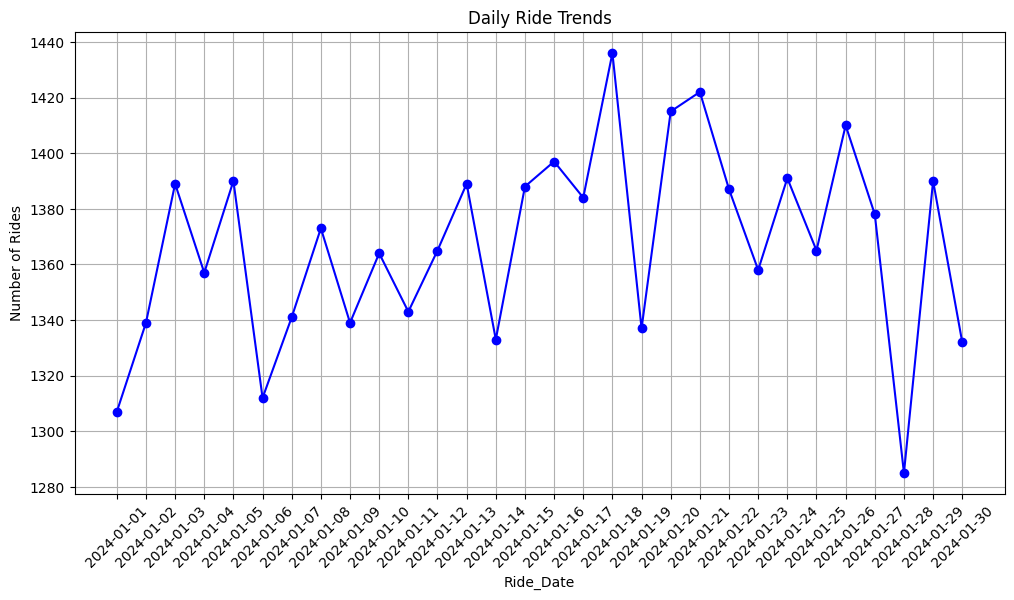

In [189]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas
ride_trends_df_pd = ride_df.groupBy(date_format('pickup_date','yyyy-MM-dd').alias('ride_date')) \
                   .agg(count('ride_id').alias('daily_rides')) \
                   .orderBy('ride_date').limit(30).toPandas()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(ride_trends_df_pd["ride_date"], ride_trends_df_pd["daily_rides"], marker='o', linestyle='-', color='b')
plt.xlabel("Ride_Date")
plt.ylabel("Number of Rides")
plt.title("Daily Ride Trends")
plt.xticks(rotation=45)
plt.grid()
plt.show()


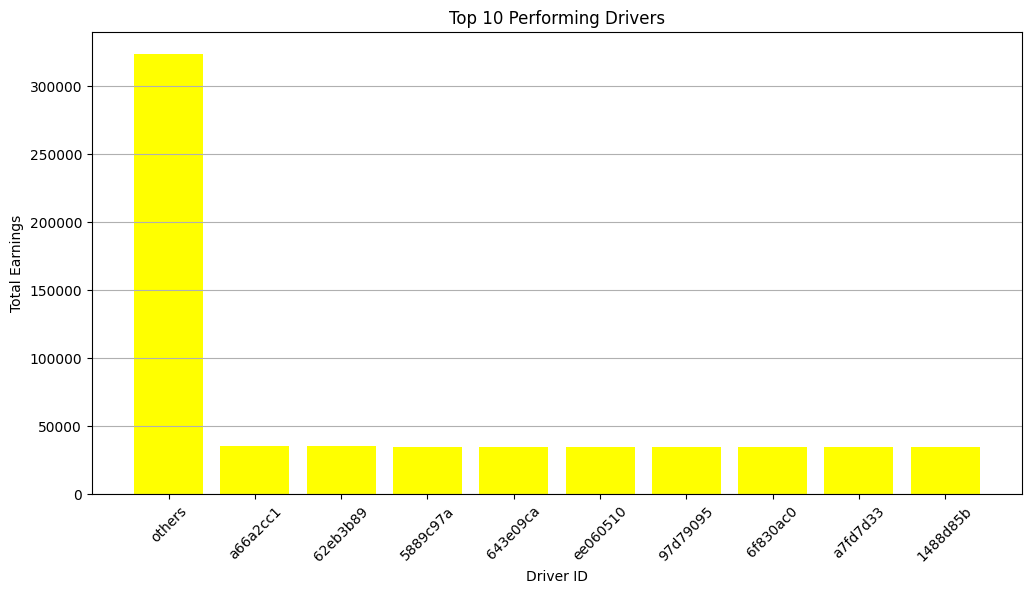

In [190]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import sum, col, round

# Convert PySpark DataFrame to Pandas
top_drivers_df_pd = ride_df.groupBy('driver_id') \
                     .agg(round(sum('fare_amount'), 2).alias('total_earnings')) \
                     .orderBy('total_earnings', ascending = False).limit(10).toPandas()
#Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_drivers_df_pd["driver_id"].astype(str), top_drivers_df_pd["total_earnings"], color='yellow')
plt.xlabel("Driver ID")
plt.ylabel("Total Earnings")
plt.title("Top 10 Performing Drivers")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

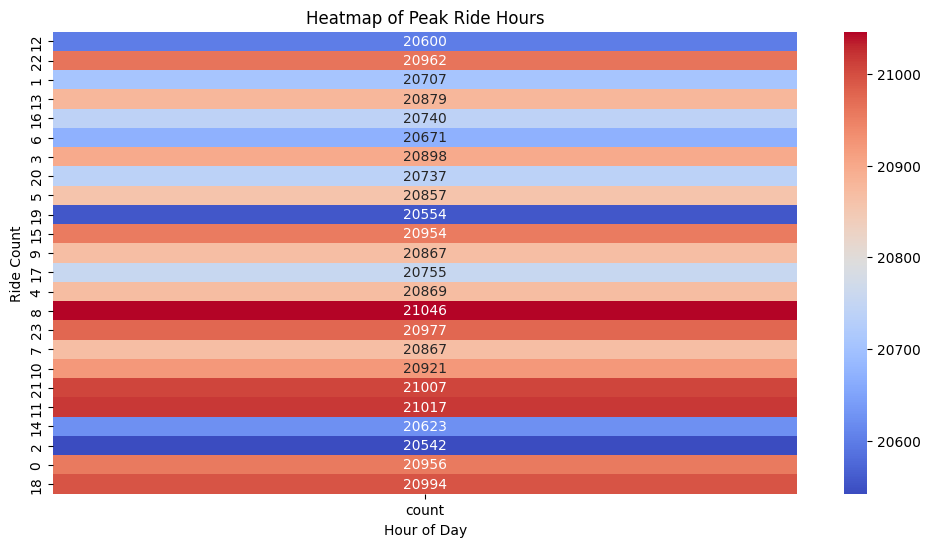

In [191]:
from pyspark.sql.functions import hour, col
import seaborn as sns


# Extract hour from pickup time
ride_hr_df = ride_df.withColumn("hour", hour(col("pickup_date")))

# Group by hour and count rides
hourly_rides_df = ride_hr_df.groupBy("hour").count().toPandas()

# Set index for pivot
hourly_rides_pivot = hourly_rides_df.set_index("hour")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_rides_pivot, cmap="coolwarm", annot=True, fmt="d")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.title("Heatmap of Peak Ride Hours")
plt.show()


In [192]:
! pip install folium


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [193]:
! pip install geopy


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
#Number of rides on a map in each province in canada. using folium and geo py

In [196]:
ride_df.select("city").distinct().show()

+---------+
|     city|
+---------+
| Winnipeg|
|   Ottawa|
| Montreal|
|  Toronto|
|Vancouver|
| Edmonton|
|  Calgary|
|  Halifax|
+---------+



In [197]:
from pyspark.sql.functions import when, col

# Define city-to-province mapping
ride_df = ride_df.withColumn(
    "province",
    when(col("city") == "Toronto", "Ontario")
    .when(col("city") == "Vancouver", "British Columbia")
    .when(col("city") == "Calgary", "Alberta")
    .when(col("city") == "Montreal", "Quebec")
    .when(col("city") == "Edmonton", "Alberta")
    .when(col("city") == "Ottawa", "Ontario")
    .when(col("city") == "Halifax", "Nova Scotia")
    .otherwise("Unknown")  # Default value if the city is not in the list
)

# Show result
ride_df.select("city", "province").show()

ride_df.show()

+---------+----------------+
|     city|        province|
+---------+----------------+
|   Ottawa|         Ontario|
| Montreal|          Quebec|
| Montreal|          Quebec|
|  Halifax|     Nova Scotia|
| Edmonton|         Alberta|
|   Ottawa|         Ontario|
| Winnipeg|         Unknown|
| Edmonton|         Alberta|
|   Ottawa|         Ontario|
|  Toronto|         Ontario|
|  Calgary|         Alberta|
|  Halifax|     Nova Scotia|
| Edmonton|         Alberta|
| Edmonton|         Alberta|
|  Toronto|         Ontario|
| Winnipeg|         Unknown|
| Edmonton|         Alberta|
|  Toronto|         Ontario|
|Vancouver|British Columbia|
|  Halifax|     Nova Scotia|
+---------+----------------+
only showing top 20 rows

+--------+---------+------------+---------+-----------+-----------+-------------------+-------------------+-----------------+-----------------+-----------+--------+---------+----------------+
| ride_id|driver_id|passenger_id|     city|distance_km|fare_amount|        pickup_date

In [198]:
ride_df.groupBy("city", "province").agg(count("*").alias("ride_count")).show()

+---------+----------------+----------+
|     city|        province|ride_count|
+---------+----------------+----------+
|   Ottawa|         Ontario|     62469|
|  Halifax|     Nova Scotia|     62959|
| Winnipeg|         Unknown|     62379|
| Edmonton|         Alberta|     62697|
|  Toronto|         Ontario|     62092|
|  Calgary|         Alberta|     62773|
|Vancouver|British Columbia|     62599|
| Montreal|          Quebec|     62032|
+---------+----------------+----------+



In [199]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim

#group the ride counts by the city and convert to pandas
city_rides_pd = ride_df.groupBy("city", "province").agg(count("*").alias("ride_count")).toPandas()

geolocator = Nominatim(user_agent="canada_rides_map")
location_cache = {}  # Cache to store already found locations

#create function to get coordinates using the name of the city from geopy.geocoders
def get_coordinates(city, province):
   key = f"{city}, {province}"
   if key in location_cache:
        return location_cache[key]
   try:
        location = geolocator.geocode(f"{city}, {province}, Canada")
        coords = (location.latitude, location.longitude) if location else (None, None)
        location_cache[key] = coords  # Store result in cache
        return coords
   except:
        return (None, None)
        
city_rides_pd["latitude"], city_rides_pd["longitude"] = zip( 
    *city_rides_pd.apply(lambda x:get_coordinates(x["city"], x["province"]), axis=1))

city_rides_pd = city_rides_pd.dropna(subset=["latitude", "longitude"])

canada_map = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

for _, row in city_rides_pd.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=max(3, 15), 
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        popup=f"{row['city']}, {row['province']}: {row['ride_count']} rides",
    ).add_to(canada_map)

# Save & Display Map
canada_map.save("canada_rides_map.html")  # Saves as an HTML file
canada_map

# README.md

## Summary of the approach

#### Analyzing Ride-Sharing Trends in Canada: Insights from Big Data